# newremagine.core

> The module's core functionality

# About core

This submodule contains the core functionality we are interested in. There are `train()` and `test()` functions, as well as some helper functions for visualization.

If you want to run `newremagine` experiments, this is the place to start.

In [1]:
from newremagine.core import train
from newremagine.core import test
from newremagine.core import plot_test
from newremagine.core import plot_latent

## train

> Given a fraction and dataset, train to self-supervised model

In [2]:
print(train.__doc__)

Given a fraction and dataset, train to self-supervised model
    
    Params
    -----
    fraction : 3-tuple
        A set of three probability values, setting the probability of 
        sampling new data, replaying old data, or imagining data and
        trainong the data.
    train_dataset : a torch dataset object
        The data to train on
    num_epsidoes : int
        The fixed number of training trials
    batch_size : int
        The size of batches to use when traning the network
    num_burn : int (> 0)
        The number of episodes before the we try and replar or 
        imagine data. Both these need a min number of experiences
        before they could be useful. 
    lr : float (> 0)
        The learning rate of the network
    device : str
        The device to use for training. Either 'cpu` or 'cuda:0'.
        See torch docs for more on this.
    perfect : bool
        If True, replay uses exact copies of the data. If False
        replay uses reconstructed data fr

## test

> Test a pre-trained model on a new dataset.

In [3]:
print(test.__doc__)

Test a pre-trained model on a new dataset.
    
    Params
    -----
    model : torch nn.Module instance
        The model we want to test. 
    test_dataset : a torch dataset object
        The data to train on
     device : str
        The device to use for training. Either 'cpu` or 'cuda:0'.
        See torch docs for more on this
    


## plot_test

> Display a grid random samples from the test data.

In [4]:
print(plot_test.__doc__)

Display a grid random samples from the test data.
    
    Params
    -----
    model : torch nn.Module instance
        The model we want to test.
    test_dataset : a torch dataset object
        The data to train on
    n : int
        The size of the grid
    img_size : int
        The size of images in the orginal data (We assume they
        are greyscale)
    


## plot_latent

> Display a grid of samples from the latent space.

In [5]:
print(plot_latent.__doc__)

Display a grid of samples from the latent space.

    Params
    -----
    model : torch nn.Module instance
        The model we want to test.
    n : int
        The size of the grid
    img_size : int
        The size of images in the orginal data (We assume they
        are greyscale)
    


# Usage

In the following cells we download some data, train on it, and plot how the model did, and then test it.

### Data

In [6]:
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST
train_dataset = MNIST(
    "data/", download=True, train=True, transform=transforms.ToTensor()
)
test_dataset = MNIST(
    "data/", train=False, transform=transforms.ToTensor()
)

### Train

In [7]:
fraction = [0.1, 0.8, 0.1]  # <--- play with this
model, memory, loss = train(
    fraction,
    train_dataset,
    num_episodes=1000,  # <--- play with this
    batch_size=8,
    num_burn=16,
    lr=0.001,
    perfect=True,
)
loss

1152.329345703125

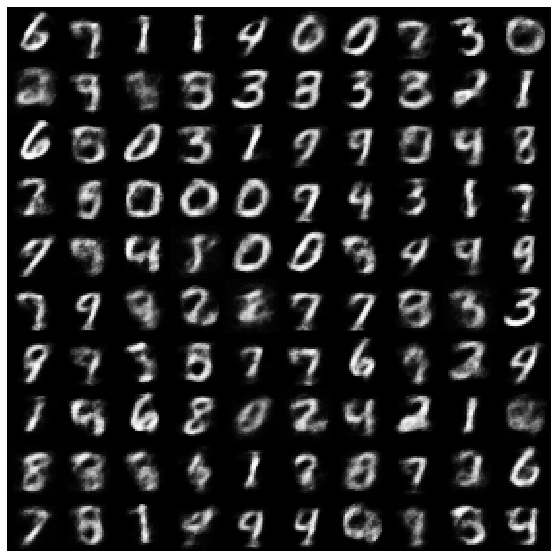

In [11]:
plot_test(train_dataset, model, 10)

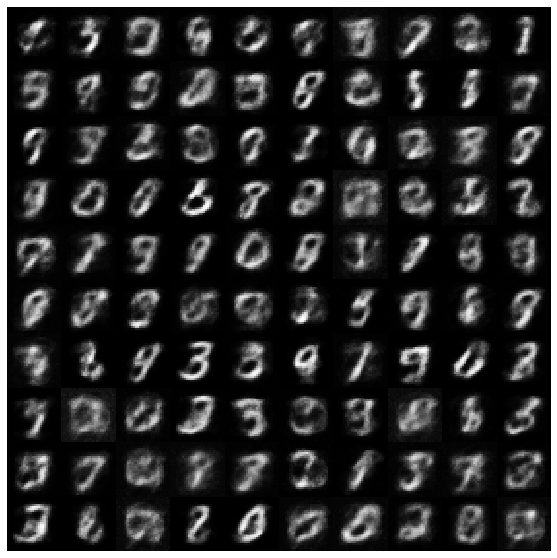

In [12]:
plot_latent(model, 10)

### Test

In [10]:
test(model, test_dataset)

1547924.1422691345